In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
vocabulary = []
with open('vocab.nips.txt','r') as vocfile:    
    for voc in vocfile:
        voc = voc.replace('\n','')
        vocabulary.append(voc)
vocabulary

['a2i',
 'aaa',
 'aaai',
 'aapo',
 'aat',
 'aazhang',
 'abandonment',
 'abbott',
 'abbreviated',
 'abcde',
 'abe',
 'abeles',
 'abi',
 'abilistic',
 'abilities',
 'ability',
 'abl',
 'able',
 'ables',
 'ablex',
 'ably',
 'abnormal',
 'abort',
 'abound',
 'abramowicz',
 'abrash',
 'abrupt',
 'abruptly',
 'abscissa',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'absorption',
 'abstr',
 'abstract',
 'abstracted',
 'abstraction',
 'abu',
 'abundances',
 'aca',
 'acad',
 'academic',
 'academy',
 'acc',
 'accelerate',
 'accelerated',
 'accelerating',
 'acceleration',
 'accelerator',
 'accent',
 'accept',
 'acceptable',
 'acceptably',
 'acceptance',
 'accepted',
 'accepting',
 'acceptor',
 'access',
 'accessed',
 'accessible',
 'accessing',
 'accommodate',
 'accommodated',
 'accomodate',
 'accompanied',
 'accompanying',
 'accomplish',
 'accomplished',
 'accomplishes',
 'accord',
 'accordance',
 'according',
 'account',
 'accounted',
 'accounting',


In [21]:
#x_mat = np.matrix(np.tile(np.random.randint(1000),(50,50)))
totalClust=10
?np.zeros

x_mat = np.zeros((1500,12419))
with open('docword.nips.txt','r') as docfile:
    # skip 3 lines
    for i in range(3):
        next(docfile)
    for doc in docfile:
        content = doc.split(' ')
        x_mat[int(content[0])-1,int(content[1])-1] = int(content[2])
    
x_mat.shape

(1500, 12419)

In [6]:
x_mat

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [36]:
# total clusters
j=totalClust
# total documents
i=x_mat.shape[0]
# total vocabularies
k=x_mat.shape[1]

# initialize pi_j matrix with same probability
pi_j = np.repeat(1/j,j)

# prepare words probability for each clusters and documents
p_jk = np.matrix(np.tile(1/k,(j,k)))
# prepare w_ij matrix initialize
w_ij = np.matrix(np.tile(0,(i,j)))

# init random for p_jk
sample = [np.random.randint(0,high=i) for x in range(j)]
p_jk = x_mat[sample,]

# small values to avoid log(0)
epsilon = 1e-7

p_jk = p_jk + epsilon
# normalize p_jk so the probability will be equal one
#p_jk = [p_jk[x,]/sum(p_jk[x,]) for x in range(j)]
p_jk = np.asarray([np.asarray(p_jk[x,]/p_jk[x,].sum()) for x in range(j)])
print(p_jk.shape)
p_jk = np.reshape(p_jk,(j,k))
# test normalize function
p_jk[1,].sum()

#np.asarray(p_jk[1,]/p_jk[1,].sum())
#np.apply_along_axis(lambda x: x,p_jk,0)

#?np.random.randint


(10, 12419)


1.0000000000000002

In [37]:
trace_Q = 100
old_Q = 0
treshold = 1e-4
while(trace_Q > treshold):
    sum_Qpart = 0
    for iTrace in range(i):
        w_ij_coll = []
        for jTrace in range(j):
            #print(x_mat[iTrace,].shape)
            #print(p_jk[jTrace,].shape)
            #print(x_mat[iTrace,].dot(np.log(p_jk[jTrace,])))
            w_ij_ex = x_mat[iTrace,].dot(np.log(p_jk[jTrace,])) + np.log(pi_j[jTrace])
            sum_Qpart = sum_Qpart + w_ij_ex
            #print(w_ij_ex.shape)
            w_ij_coll.append(w_ij_ex)
            w_ij[iTrace,jTrace] = w_ij_ex
        # normalize w_ij
        max_w_ij = max(w_ij_coll)
        w_ij[iTrace,] = w_ij[iTrace,] - max_w_ij - np.log(np.sum(np.exp(w_ij[iTrace,]-max_w_ij)))

    for jTrace in range(j):
        sigmaXiWij = np.zeros(k)
        sigmaWij = 0
        sigmaXi1wij = 0
        for iTrace in range(i):
            sigmaXiWij = sigmaXiWij + x_mat[iTrace,] * np.exp(w_ij[iTrace,jTrace])
            sigmaXi1wij = sigmaXi1wij + (x_mat[iTrace,].dot(np.ones(k))) * np.exp(w_ij[iTrace,jTrace])
            sigmaWij = sigmaWij + np.exp(w_ij[iTrace,jTrace])
        p_jk[jTrace,] = sigmaXiWij / sigmaXi1wij
        pi_j[jTrace] = sigmaWij / k

    # normalize
    p_jk = p_jk + epsilon
    # normalize p_jk so the probability will be equal one
    #p_jk = [p_jk[x,]/sum(p_jk[x,]) for x in range(j)]
    p_jk = np.asarray([np.asarray(p_jk[x,]/p_jk[x,].sum()) for x in range(j)])
    print(p_jk.shape)
    p_jk = np.reshape(p_jk,(j,k))
    # test normalize function
    #p_jk[1,].sum()
    
    #calculate the Q change
    new_Q = (sum_Qpart*(w_ij)).sum()
    #print(new_Q)
    trace_Q = abs((old_Q-new_Q)/new_Q)
    old_Q = new_Q
    #print(trace_Q.shape)
    print(trace_Q)


(10, 12419)
1.0
(10, 12419)
2.48518666629
(10, 12419)
0.0255347096742
(10, 12419)
0.00822759183567
(10, 12419)
0.00880863573186
(10, 12419)
0.00115121655696
(10, 12419)
0.00159118159142
(10, 12419)
0.000691730428598
(10, 12419)
0.000139180308143
(10, 12419)
0.000289010857344
(10, 12419)
9.84402298359e-07


In [38]:
p_jk[1,].sum()

1.0

In [39]:
npvoc = np.array(vocabulary)

In [51]:
npvoc[np.argsort(-p_jk)]

array([['network', 'model', 'data', ..., 'flicker', 'fogel', 'zwislocki'],
       ['network', 'model', 'learning', ..., 'loess', 'lives', 'zwislocki'],
       ['network', 'neuron', 'function', ..., 'latent', 'lea', 'zwislocki'],
       ..., 
       ['learning', 'function', 'algorithm', ..., 'innate', 'injected',
        'zwislocki'],
       ['learning', 'rules', 'examples', ..., 'helsinki', 'hemisphere',
        'zwislocki'],
       ['cell', 'direction', 'model', ..., 'illus', 'ild', 'zwislocki']], 
      dtype='<U23')

<Container object of 10 artists>

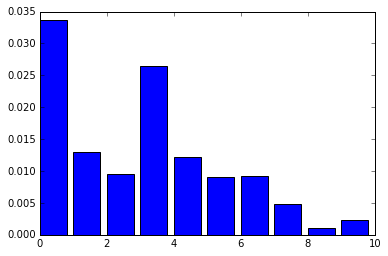

In [41]:
plt.bar(range(totalClust),pi_j)